In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [137]:
sns.set_style("white")
sns.set_palette('RdBu', 10)

In [50]:
df = pd.read_csv('Data/Sleep.csv')

In [51]:
#Data test: Tquality is correct if the sum of these three columns is 100; otherwise, the row is corrupt

df['Check'] = df['REM sleep percentage'] + df['Deep sleep percentage'] + df['Light sleep percentage']
df['Check'].value_counts()

100    452
Name: Check, dtype: int64

In [52]:
#All the data is correct
df = df.drop('Check', axis=1)

In [53]:
#Check missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing:.1%}')

Age - 0.0%
Gender - 0.0%
Sleep duration - 0.0%
Sleep efficiency - 0.0%
REM sleep percentage - 0.0%
Deep sleep percentage - 0.0%
Light sleep percentage - 0.0%
Awakenings - 0.0%
Caffeine consumption - 0.0%
Alcohol consumption - 0.0%
Smoking status - 0.0%
Exercise frequency - 0.0%
BedtimeHours - 0.0%
WakeuptimeHours - 0.0%
day - 0.0%
RealSleep - 0.0%
SleepRem - 0.0%
SleepDeep - 0.0%
SleepLight - 0.0%
RealNoSleep - 0.0%


In [54]:
# Numerize Columns

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,BedtimeHours,WakeuptimeHours,day,RealSleep,SleepRem,SleepDeep,SleepLight,RealNoSleep
0,65,0,6.0,0.88,18,70,12,0,0,0,1,3,2,8,2,5.28,1.08,4.20,0.72,0.72
1,69,1,7.0,0.66,19,28,53,3,0,3,1,3,4,12,3,4.62,1.33,1.96,3.71,2.38
2,40,0,8.0,0.89,20,70,10,1,0,0,0,3,7,5,5,7.12,1.60,5.60,0.80,0.88
3,40,0,6.0,0.51,23,25,52,3,50,5,1,1,5,11,6,3.06,1.38,1.50,3.12,2.94
4,57,1,8.0,0.76,27,55,18,3,0,3,0,3,2,12,2,6.08,2.16,4.40,1.44,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,7.5,0.91,22,57,21,0,0,0,0,5,8,5,2,6.83,1.65,4.27,1.57,0.67
448,52,1,6.0,0.74,28,57,15,4,25,0,0,3,6,0,6,4.44,1.68,3.42,0.90,1.56
449,40,0,8.5,0.55,20,32,48,1,24,3,1,0,10,9,5,4.68,1.70,2.72,4.08,3.82
450,45,1,7.0,0.76,18,72,10,3,0,0,0,3,6,2,4,5.32,1.26,5.04,0.70,1.68


In [55]:
#Drop some columns to make the heatmap more readable

df_numerized = df_numerized.drop(['RealNoSleep',  'SleepRem', 'SleepDeep', 'SleepLight', 'RealSleep'], axis=1)
df_numerized

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,BedtimeHours,WakeuptimeHours,day
0,65,0,6.0,0.88,18,70,12,0,0,0,1,3,2,8,2
1,69,1,7.0,0.66,19,28,53,3,0,3,1,3,4,12,3
2,40,0,8.0,0.89,20,70,10,1,0,0,0,3,7,5,5
3,40,0,6.0,0.51,23,25,52,3,50,5,1,1,5,11,6
4,57,1,8.0,0.76,27,55,18,3,0,3,0,3,2,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,7.5,0.91,22,57,21,0,0,0,0,5,8,5,2
448,52,1,6.0,0.74,28,57,15,4,25,0,0,3,6,0,6
449,40,0,8.5,0.55,20,32,48,1,24,3,1,0,10,9,5
450,45,1,7.0,0.76,18,72,10,3,0,0,0,3,6,2,4


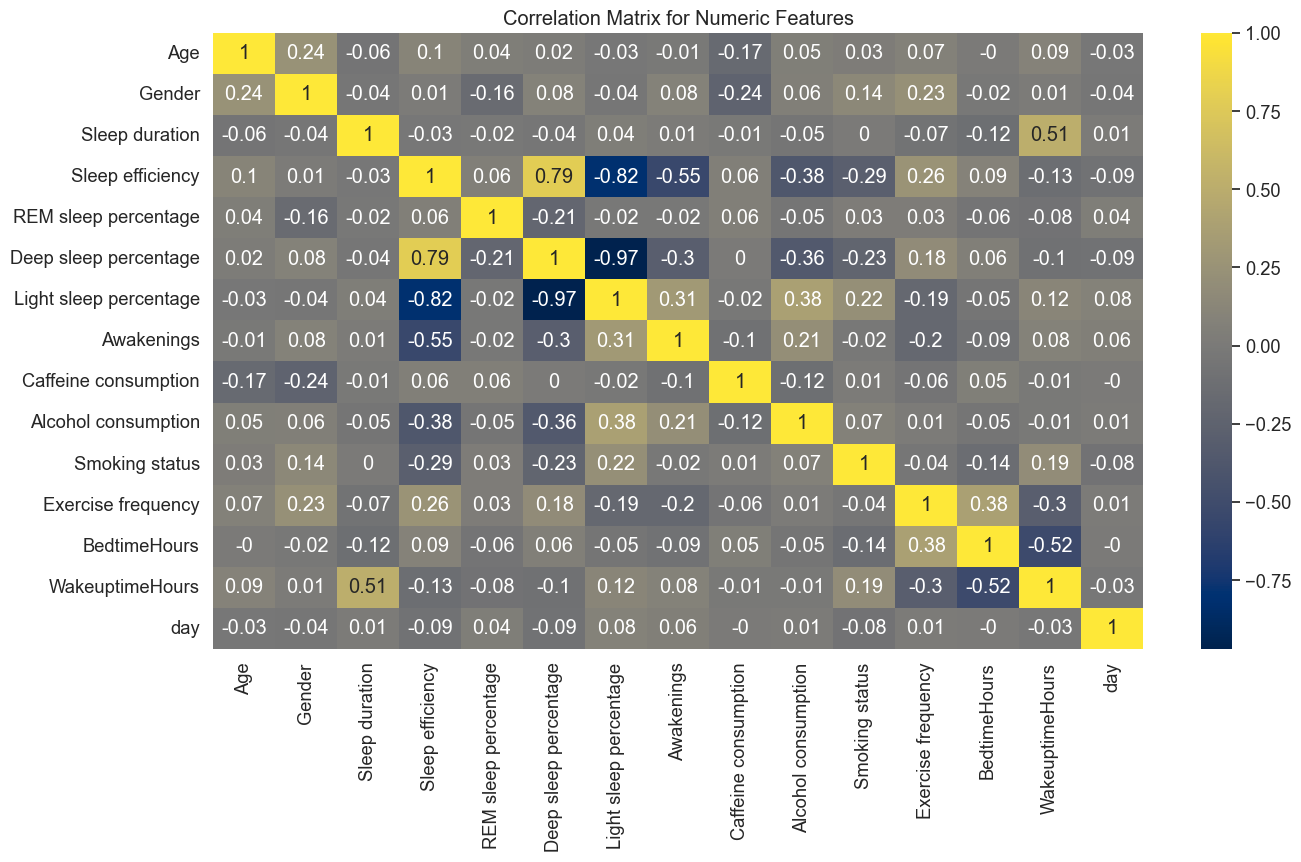

In [129]:
# calculate the correlation matrix
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True).round(2)

# set up the figure size
plt.figure(figsize=(15, 8))

# plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')

# add labels
plt.title('Correlation Matrix for Numeric Features')

# show the plot
plt.show()

In [ ]:
# Premises:
# - Positive impact of sleep scheudle on sleep quality.
# - Positive impact of sleep duration on quality.
# - Negative impact of alcohol in deep sleep since alcohol affect sleep quality.
# - Positive impact of excercise

# Results:
# High correlation between deep sleep and sleep quality
# High negative correlation between light sleep and sleep quality
# Moderate correlation between the sleep scheudle and sleep quality
# Moderate negative correlation between awakenings and sleep quality
# Moderate-low correlation between alcohol and sleep quality, and a bit lower for smokers.
# Surprinsinly there is no correlation between sleep duration and quality.

In [62]:
correlation_mat = df_numerized.corr()
correlation_mat

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,BedtimeHours,WakeuptimeHours,day
Age,1.000000,0.244468,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.009557,-0.168519,0.047380,0.031237,0.070775,-0.000376,0.090003,-0.034755
Gender,0.244468,1.000000,-0.044376,0.010062,-0.161102,0.075939,-0.040534,0.081414,-0.242870,0.057344,0.143020,0.230770,-0.022098,0.006363,-0.037778
Sleep duration,-0.062462,-0.044376,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.007352,-0.014606,-0.045510,0.004211,-0.067064,-0.117621,0.508143,0.010701
Sleep efficiency,0.098357,0.010062,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.550426,0.063066,-0.383701,-0.290026,0.257688,0.089091,-0.134325,-0.087009
REM sleep percentage,0.042091,-0.161102,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.016281,0.057993,-0.051111,0.032184,0.029341,-0.055097,-0.076001,0.036279
Deep sleep percentage,0.021730,0.075939,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.301815,0.001620,-0.356217,-0.226802,0.179152,0.059723,-0.095808,-0.088318
Light sleep percentage,-0.031905,-0.040534,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.312275,-0.015009,0.375908,0.224436,-0.189892,-0.048365,0.115438,0.081929
Awakenings,-0.009557,0.081414,0.007352,-0.550426,-0.016281,-0.301815,0.312275,1.000000,-0.098171,0.208274,-0.020524,-0.198976,-0.085974,0.084672,0.057910
Caffeine consumption,-0.168519,-0.242870,-0.014606,0.063066,0.057993,0.001620,-0.015009,-0.098171,1.000000,-0.117406,0.007232,-0.061942,0.054230,-0.008881,-0.001893
Alcohol consumption,0.047380,0.057344,-0.045510,-0.383701,-0.051111,-0.356217,0.375908,0.208274,-0.117406,1.000000,0.073499,0.005519,-0.049981,-0.006102,0.008955


In [63]:
#Clasify correlations pairs for visibility purposes
sorted_corr_pairs = correlation_mat.unstack().sort_values()

sorted_corr_pairs

Deep sleep percentage   Light sleep percentage   -0.974311
Light sleep percentage  Deep sleep percentage    -0.974311
Sleep efficiency        Light sleep percentage   -0.819204
Light sleep percentage  Sleep efficiency         -0.819204
Awakenings              Sleep efficiency         -0.550426
                                                    ...   
Sleep efficiency        Sleep efficiency          1.000000
Sleep duration          Sleep duration            1.000000
Gender                  Gender                    1.000000
WakeuptimeHours         WakeuptimeHours           1.000000
day                     day                       1.000000
Length: 225, dtype: float64

In [64]:
#Show high correlated values
high_corr = sorted_corr_pairs[np.logical_and(sorted_corr_pairs > 0.5, sorted_corr_pairs < 1)]

high_corr

WakeuptimeHours        Sleep duration           0.508143
Sleep duration         WakeuptimeHours          0.508143
Sleep efficiency       Deep sleep percentage    0.787335
Deep sleep percentage  Sleep efficiency         0.787335
dtype: float64

In [67]:
#Show mid correlated values
mid_corr = sorted_corr_pairs[np.logical_and(sorted_corr_pairs >= 0.25, sorted_corr_pairs < 0.5)]

mid_corr

Exercise frequency      Sleep efficiency          0.257688
Sleep efficiency        Exercise frequency        0.257688
Awakenings              Light sleep percentage    0.312275
Light sleep percentage  Awakenings                0.312275
Alcohol consumption     Light sleep percentage    0.375908
Light sleep percentage  Alcohol consumption       0.375908
Exercise frequency      BedtimeHours              0.378433
BedtimeHours            Exercise frequency        0.378433
dtype: float64

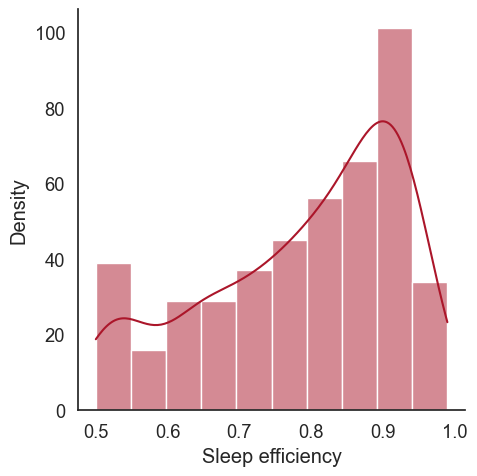

In [138]:
sns.displot(df['Sleep efficiency'], kde=True)
plt.xlabel('Sleep efficiency')
plt.ylabel('Density')
plt.show()

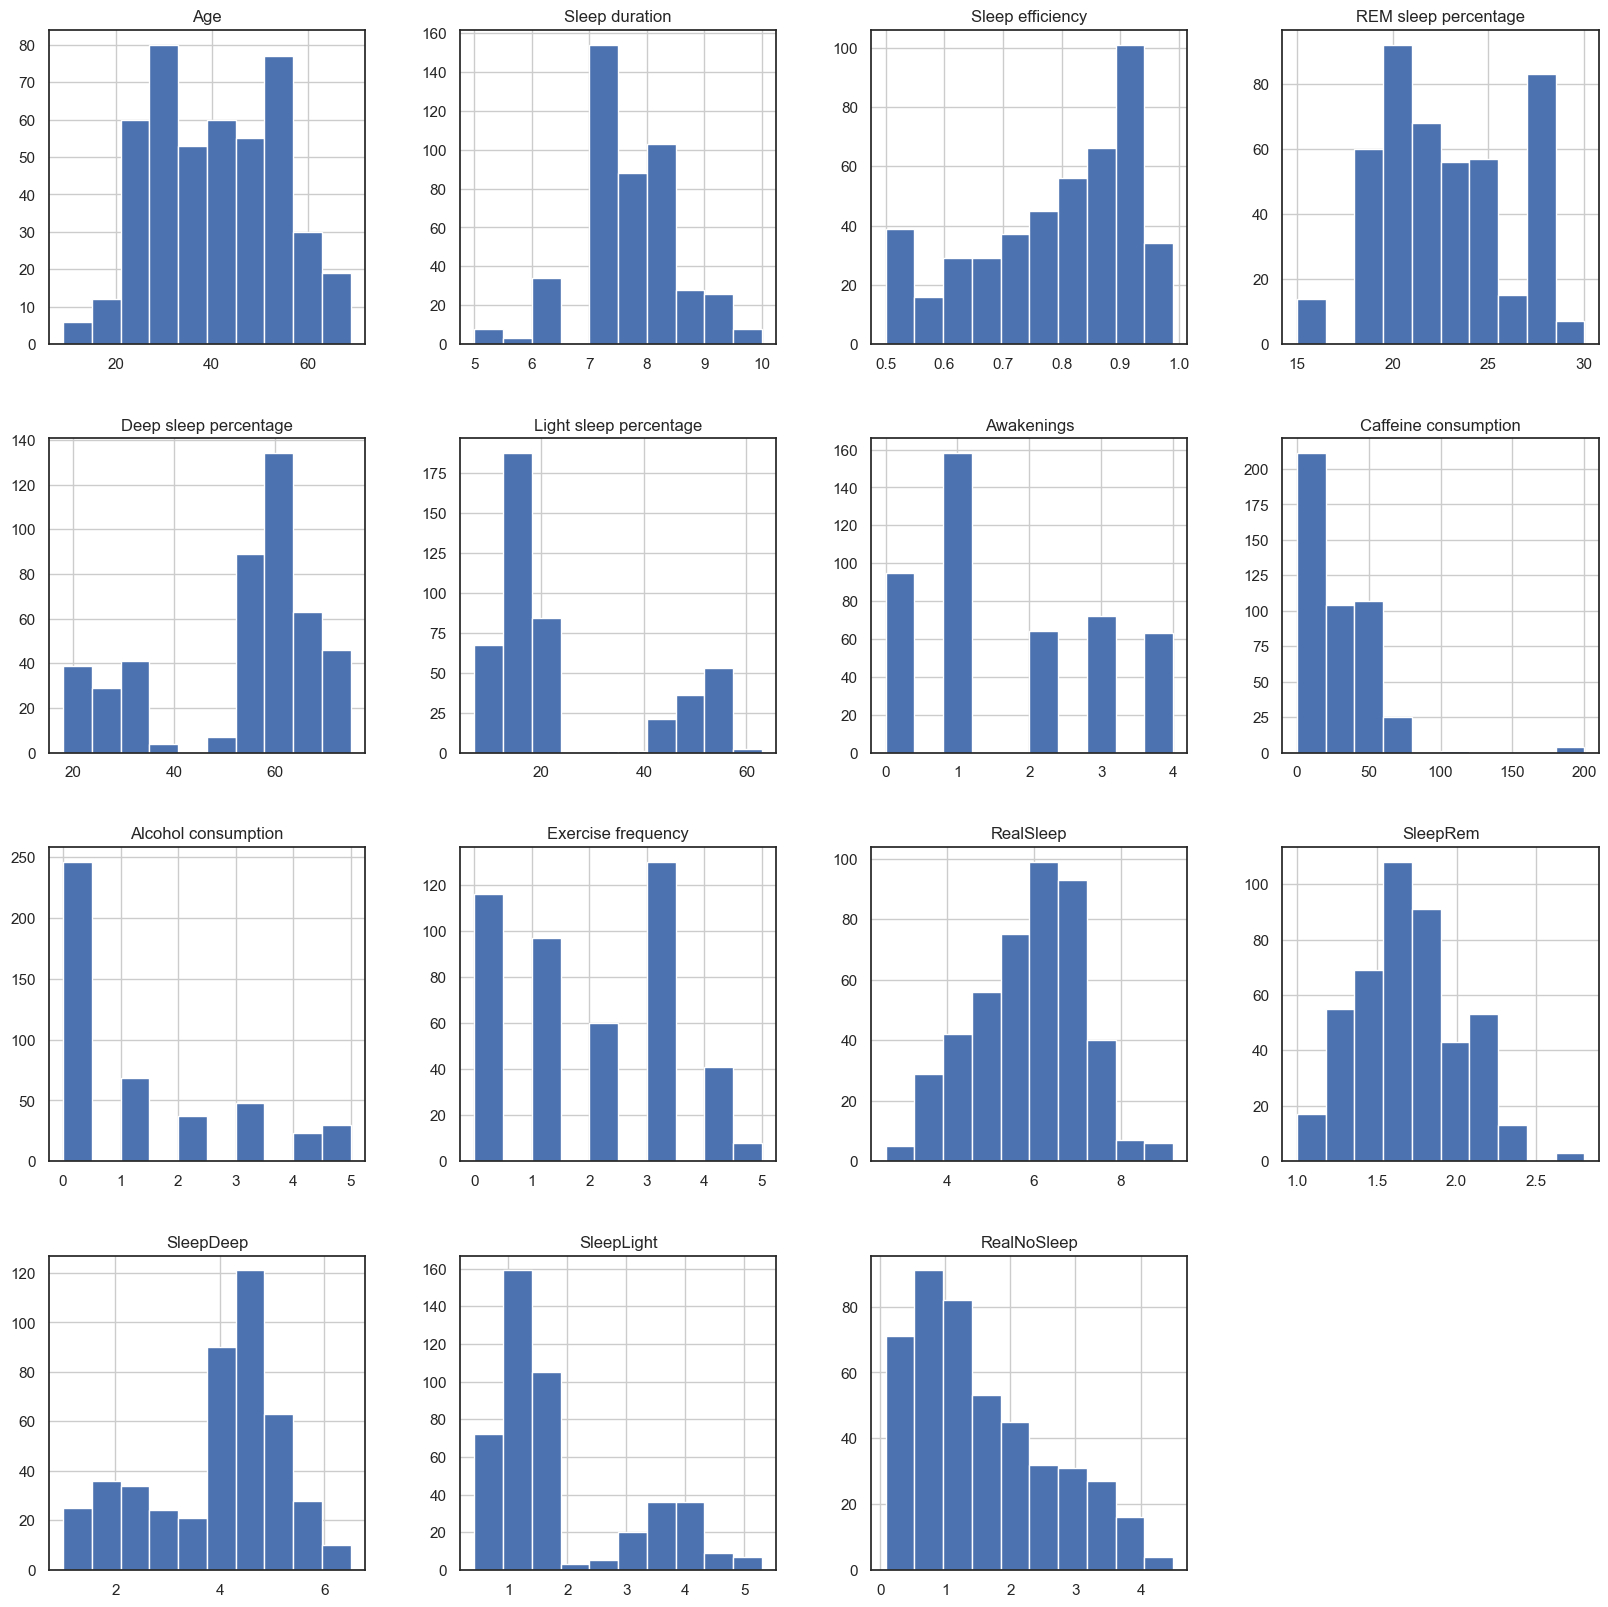

In [146]:
# Show the distribution of values in each column of the dataframe
df.hist(figsize=(20, 20))
plt.show()

<Axes: xlabel='Sleep duration', ylabel='Sleep efficiency'>

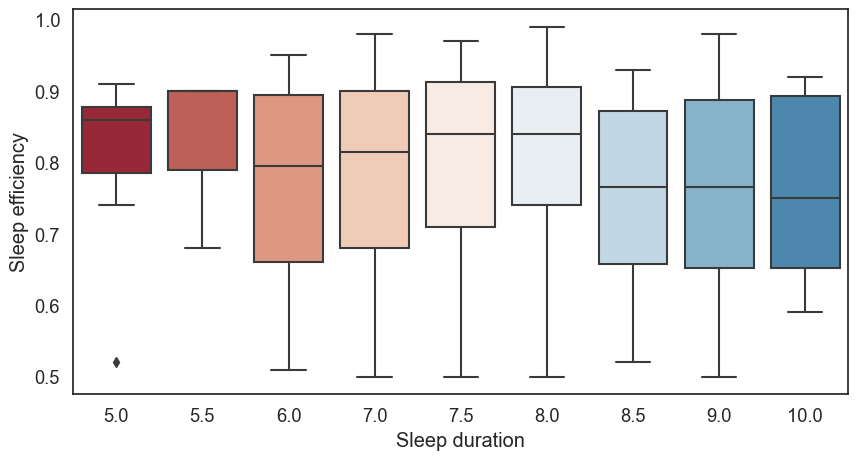

In [140]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Sleep duration'], y=df['Sleep efficiency'], data=df)

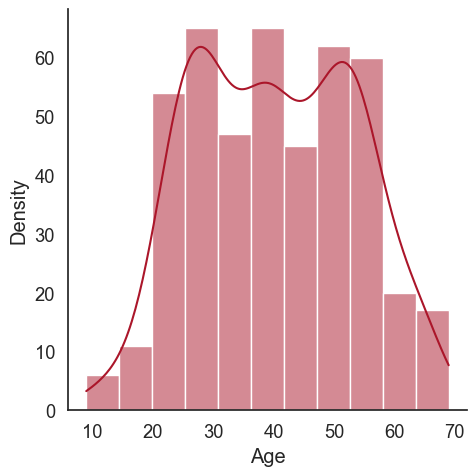

In [141]:
sns.displot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

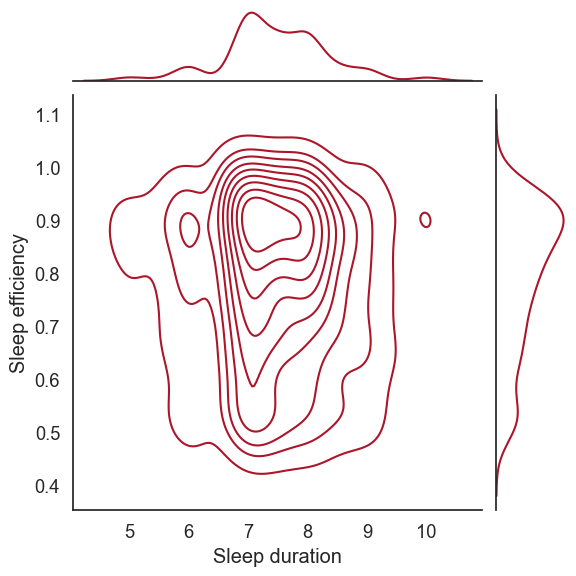

In [142]:
sns.jointplot(x='Sleep duration',y='Sleep efficiency',data = df,kind = 'kde' )

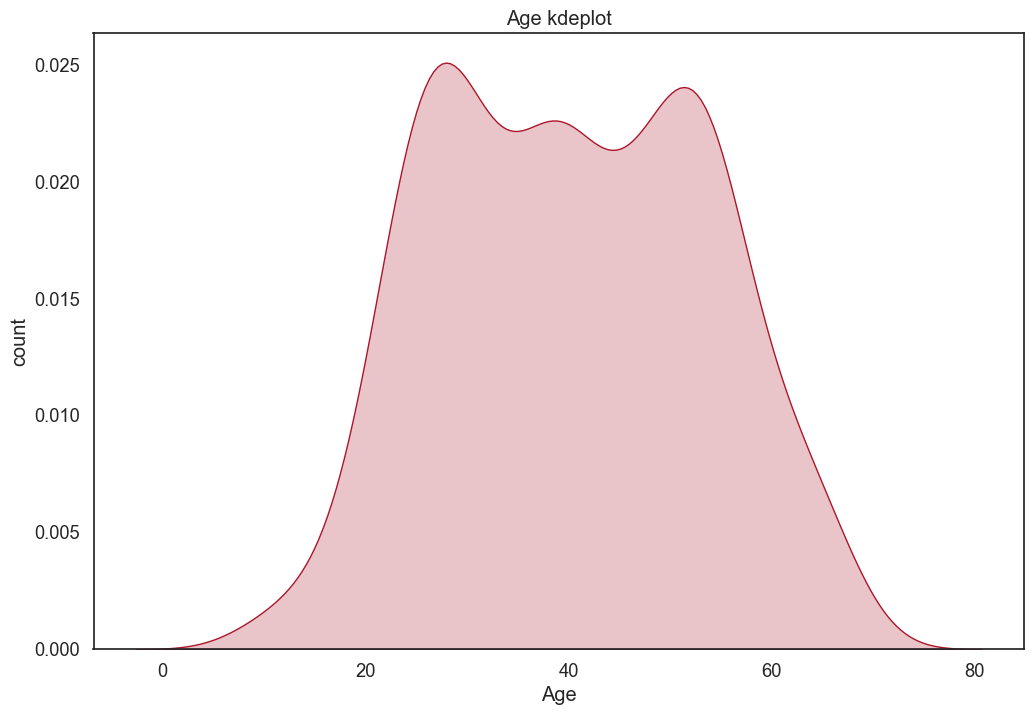

In [144]:
sns.kdeplot(data=df, x="Age",fill=True)
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Age kdeplot")
plt.show()

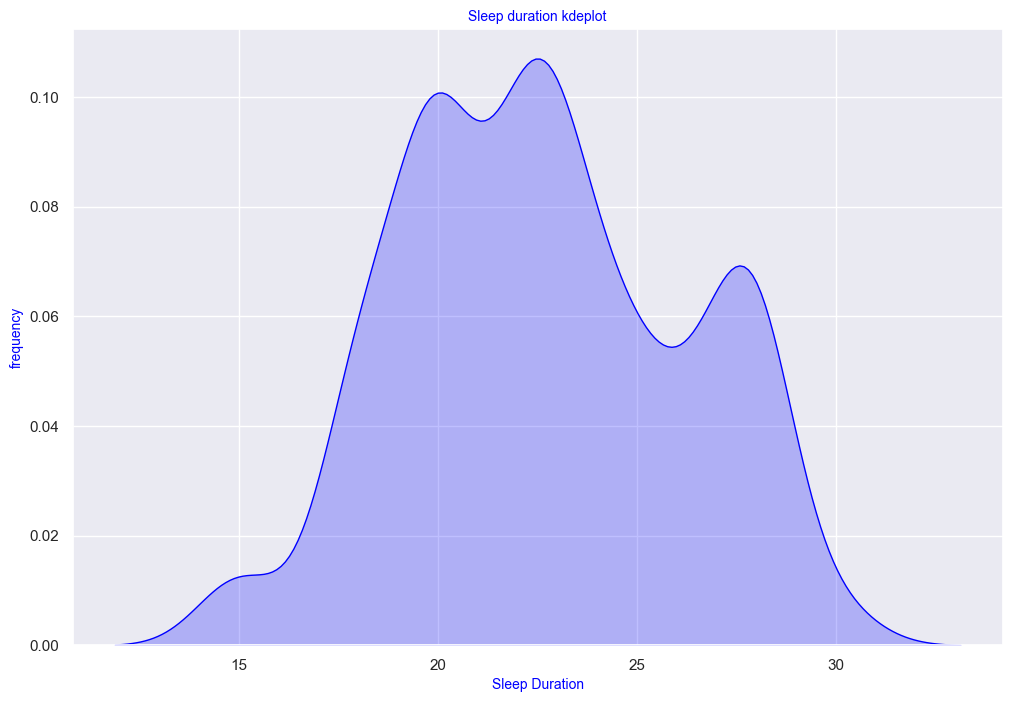

In [108]:
sns.kdeplot(data=df, x="REM sleep percentage",color="blue",fill=True)
plt.xlabel("Sleep Duration", color="blue", fontsize=10)
plt.ylabel("frequency", color="blue", fontsize=10)
plt.title("Sleep duration kdeplot", color="blue",fontsize=10)
plt.show()

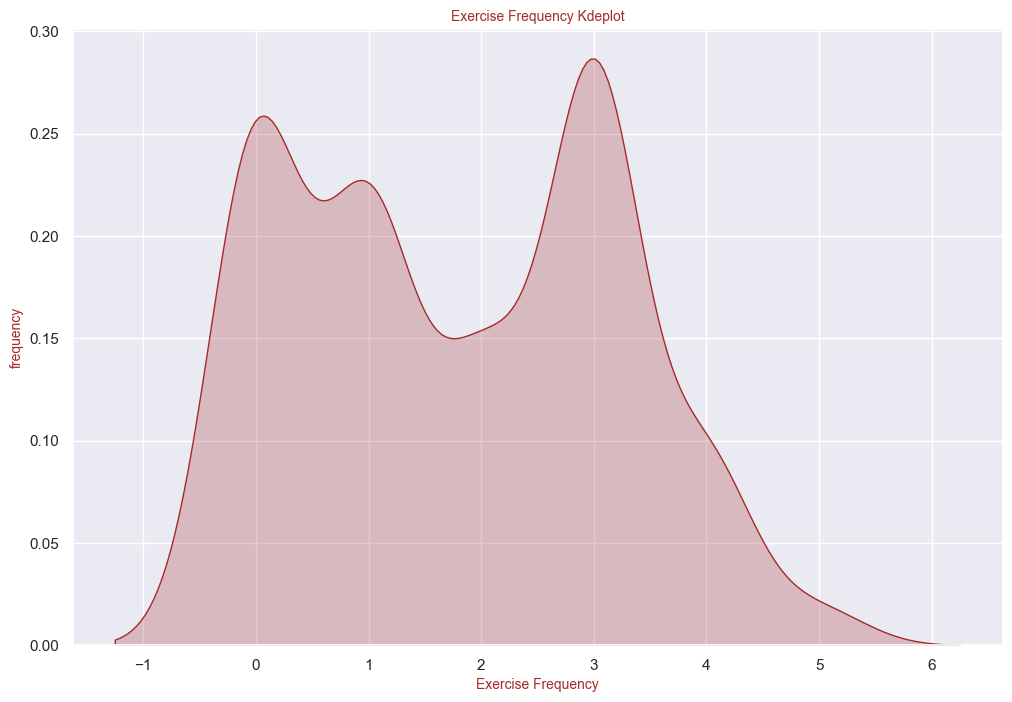

In [110]:
sns.kdeplot(data=df, x="Exercise frequency",color="brown",fill=True)
plt.xlabel("Exercise Frequency", color="brown", fontsize=10)
plt.ylabel("frequency", color="brown", fontsize=10)
plt.title("Exercise Frequency Kdeplot", color="brown",fontsize=10)
plt.show()

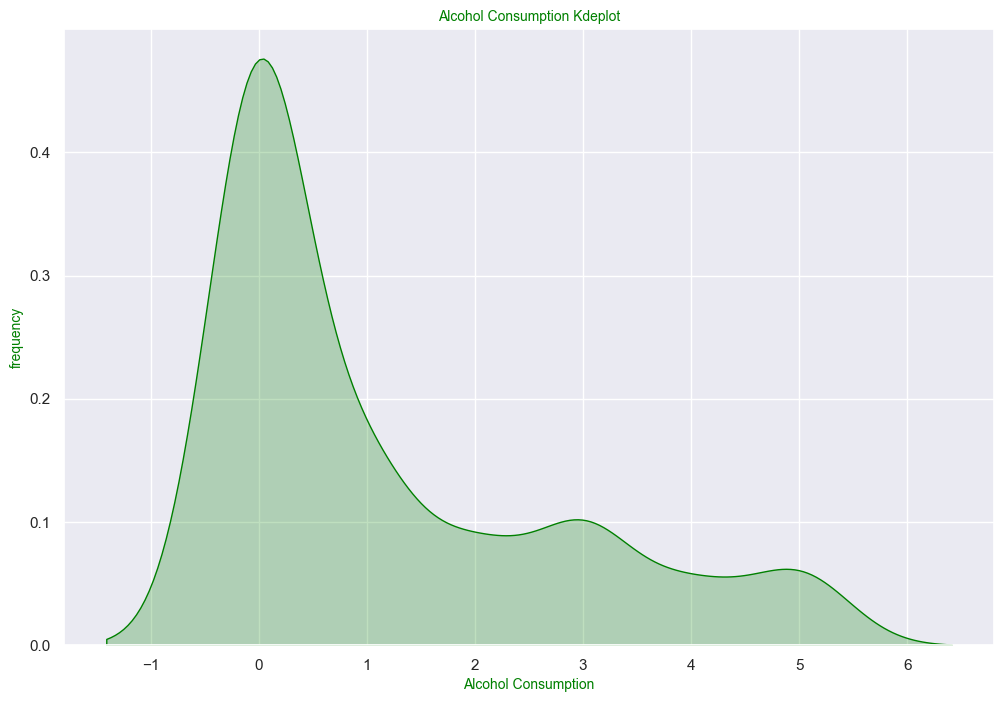

In [112]:
sns.kdeplot(data=df, x="Alcohol consumption",color="green",fill=True)
plt.xlabel("Alcohol Consumption", color="green", fontsize=10)
plt.ylabel("frequency", color="green", fontsize=10)
plt.title("Alcohol Consumption Kdeplot", color="green",fontsize=10)
plt.show()

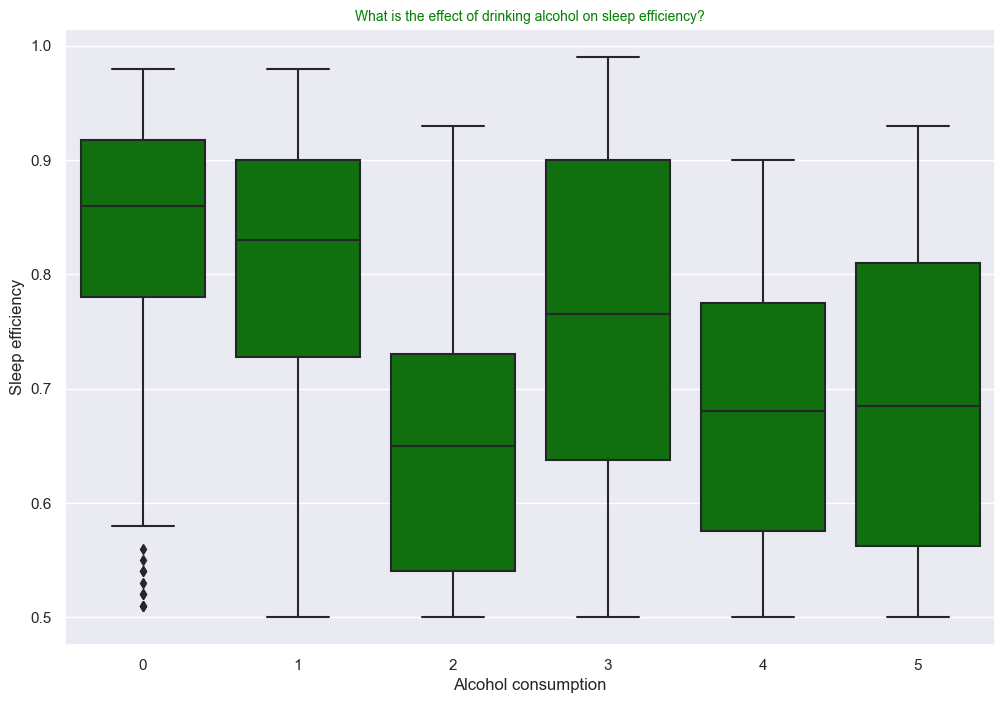

In [113]:
sns.boxplot(data=df,x="Alcohol consumption",y="Sleep efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

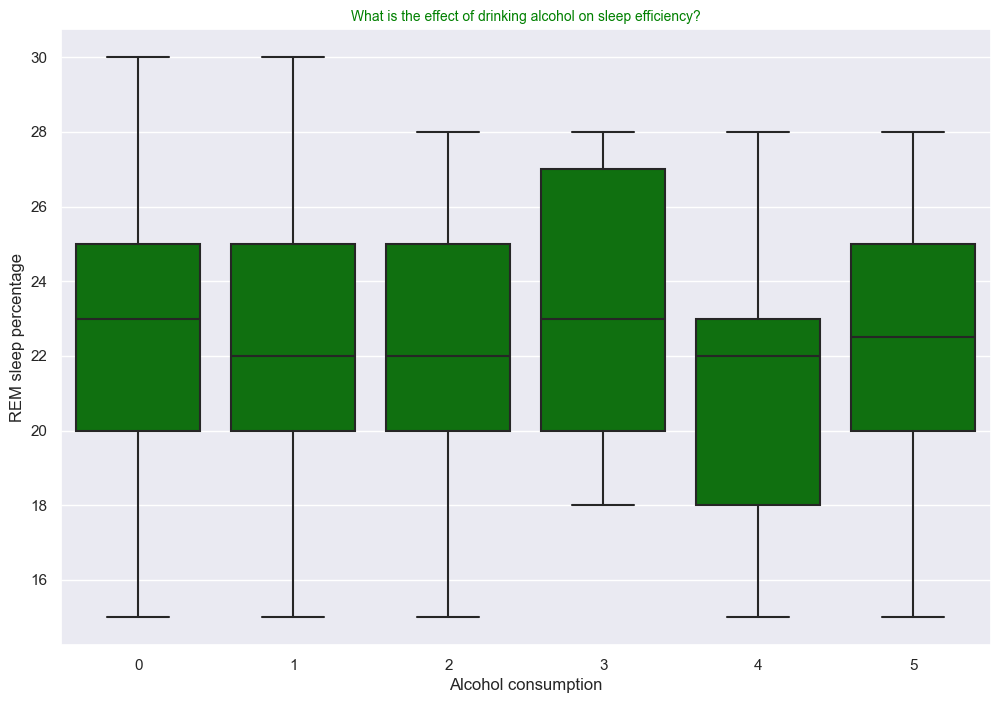

In [114]:
sns.boxplot(data=df,x="Alcohol consumption",y="REM sleep percentage", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

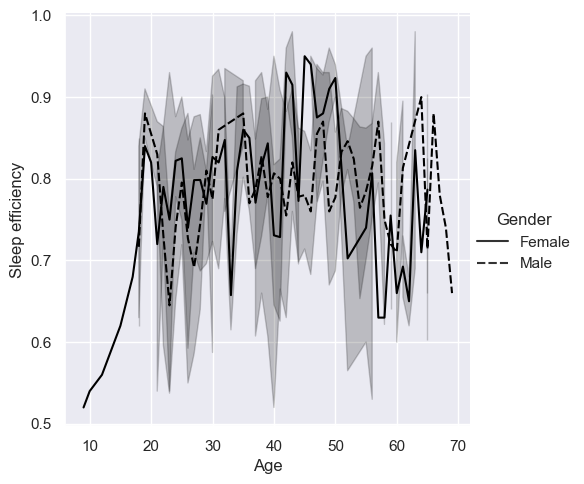

In [98]:
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep efficiency", style="Gender", color="black"
)
plt.show()

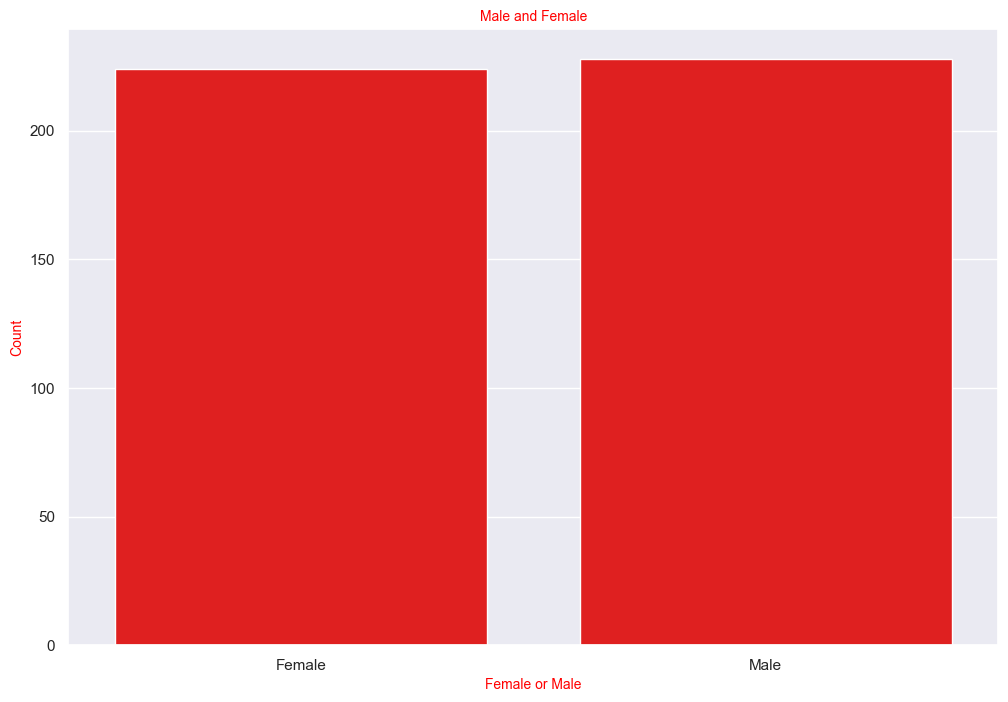

In [99]:
sns.countplot(data=df,x="Gender", color="red")
plt.xlabel("Female or Male", color="red",fontsize=10)
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Male and Female", color="red",fontsize=10)
plt.show()

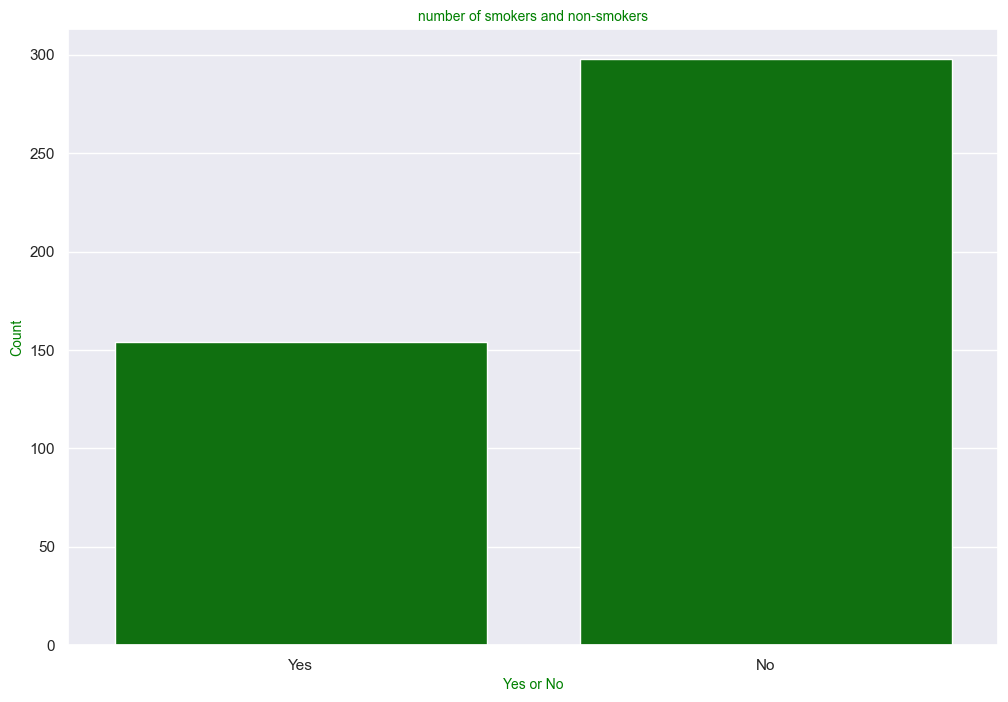

In [101]:
sns.countplot(data=df,x="Smoking status", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()

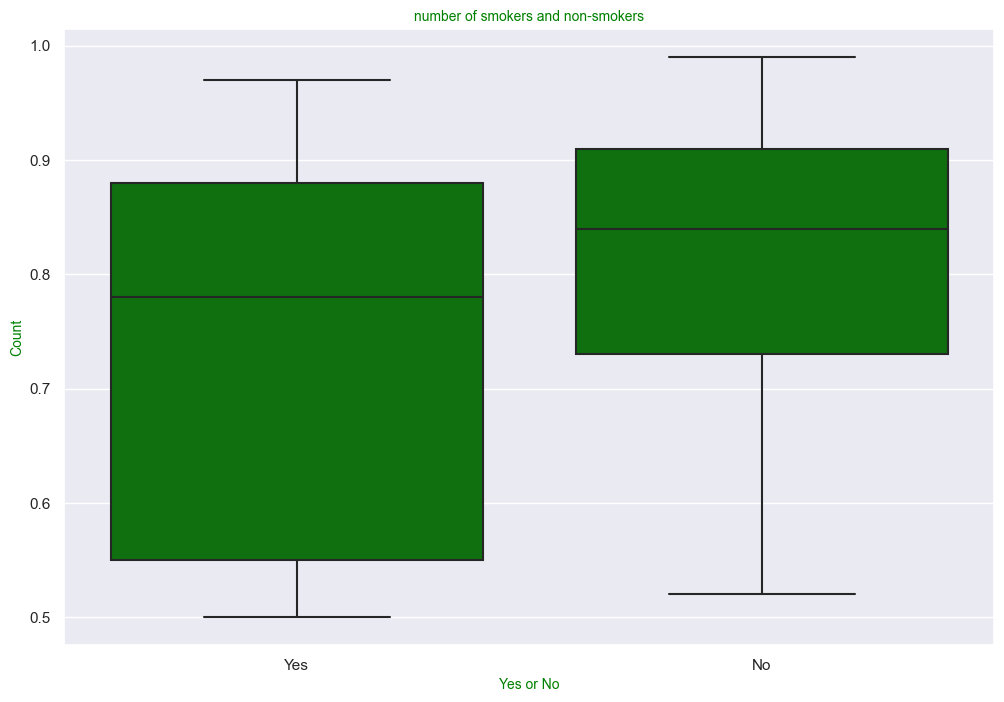

In [104]:
sns.boxplot(data=df,x="Smoking status",y="Sleep efficiency", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()

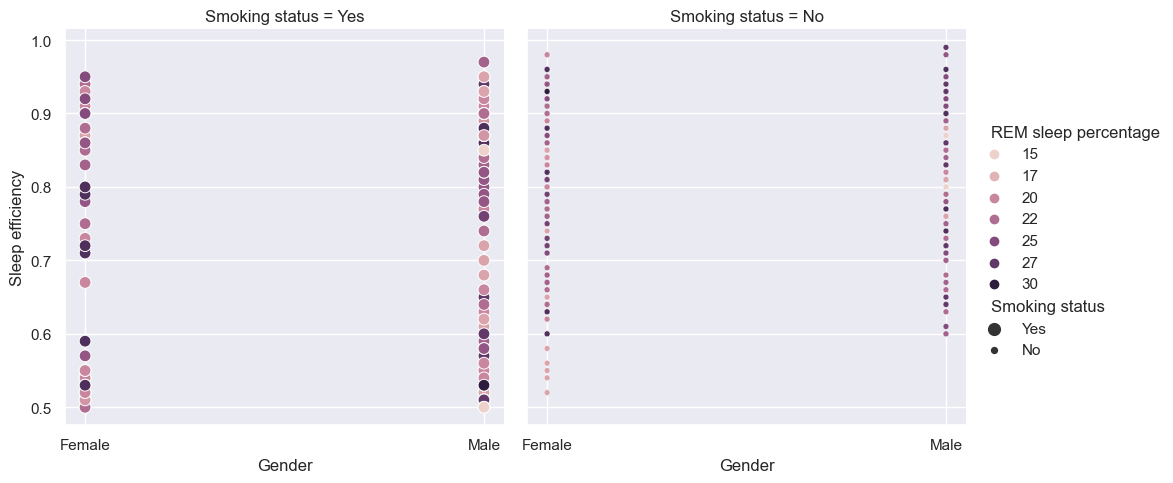

In [106]:
sns.relplot(
    data=df,
    x="Gender", y="Sleep efficiency", col="Smoking status",
    hue="REM sleep percentage", size="Smoking status",
)
plt.show()